<a href="https://colab.research.google.com/github/jamescp/python/blob/main/AnaliseCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos dados da pandemia de Covid-19 no Maranhão durante os anos de 2020 a 2022.**

Autor: Jamesson Amaral Gomes
> email: jamesson.agomes@gmail.com


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # plotting data


In [94]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

In [98]:
#Transformação tipo da colunda data:
df['date'] = pd.to_datetime(df['date'])

#Seleciona somente o estado do Maranhão
dadosMA= df[df.state == "MA"]


Casos e Óbitos atualizados do Maranhão.

In [101]:
#Visualização do conjunto de dos dados 
dadosMA


,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,mes,ano
220,12,2020-03-20,Brazil,MA,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar,2020
247,12,2020-03-21,Brazil,MA,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar,2020
275,13,2020-03-22,Brazil,MA,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar,2020
303,13,2020-03-23,Brazil,MA,TOTAL,0,0,6,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar,2020
331,13,2020-03-24,Brazil,MA,TOTAL,0,0,0,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23879,228,2022-07-13,Brazil,MA,TOTAL,1,10909,878,449460,10909,...,5622927.0,79.47397,4485591.0,63.39896,125299.0,1.77097,1999049.0,28.25439,Jul,2022
23907,228,2022-07-14,Brazil,MA,TOTAL,4,10913,1055,450515,10913,...,5624375.0,79.49443,4486191.0,63.40744,125299.0,1.77097,2039279.0,28.82299,Jul,2022
23935,228,2022-07-15,Brazil,MA,TOTAL,4,10917,853,451368,10917,...,5625522.0,79.51064,4487745.0,63.42940,125299.0,1.77097,2039279.0,28.82299,Jul,2022
23963,228,2022-07-16,Brazil,MA,TOTAL,0,10917,0,451368,10917,...,5625522.0,79.51064,4487745.0,63.42940,125299.0,1.77097,2039279.0,28.82299,Jul,2022


In [20]:
#Imprime dados atualizados dos Casos e Óbitos acumulados desde o início da pandemia no Maranhão.
print("DATA:",dt.date.today())
print('CASOS MA:', dadosMA['newCases'].sum(),'\nÓBITOS MA:',dadosMA['newDeaths'].sum())


DATA: 2022-07-19
CASOS MA: 451368 
ÓBITOS MA: 10917


In [62]:
#CasosMes = pd.DataFrame(df_MA.groupby(df_MA['date'].dt.strftime('%b/%Y'))['newCases'].sum().sort_values(ascending=True))
def aux (x):
  return(x.dt.strftime('%b'))


In [100]:
#Cria as colunas  mes e ano
dadosMA['mes'] = dadosMA['date'].dt.strftime('%b')
dadosMA['ano'] = dadosMA['date'].dt.strftime('%Y')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:


teste = dadosMA.groupby(['ano', 'mes']).agg(
    casos = ("newCases", "sum"),
    obitos = ("newDeaths", "sum")
)
                         
teste

casos  obitos
ano  mes               
2020 Apr   3455     203
     Aug  30954     433
     Dec   7768     204
     Jul  40210     965
     Jun  45154    1072
     Mar     51       1
     May  31791     772
     Nov   7343     243
     Oct  12263     297
     Sep  21949     310
2021 Apr  24509    1206
     Aug  11948     395
     Dec   5597      83
     Feb  11819     355
     Jan   6550     197
     Jul  19670     593
     Jun  27147     903
     Mar  23094    1018
     May  23389     864
     Nov   3971      57
     Oct   4841      63
     Sep   7172     143
2022 Apr   6995      11
     Feb  26309     302
     Jan  15922     111
     Jul   8127      21
     Jun   5175       7
     Mar  12711      82
     May   5484       6

In [157]:
Month = ['Month',
        "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split()]



In [173]:
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
meses

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

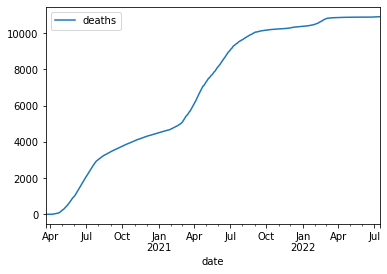

In [158]:
dadosMA.plot(x='date', y='deaths');

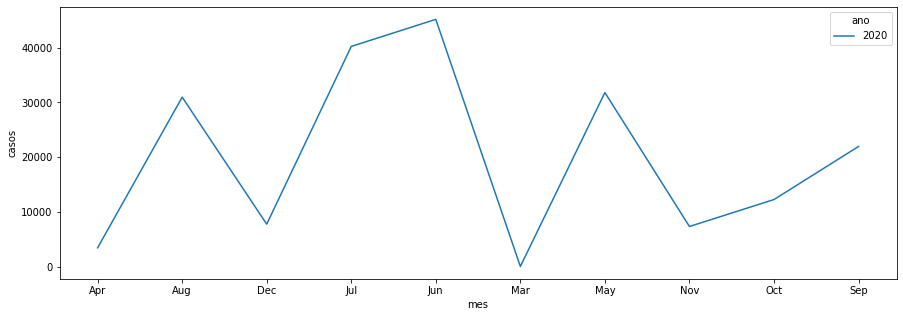

In [182]:
plt.figure(figsize=(15,5))
sns.lineplot(x='mes',y='casos',data=teste.query("ano in['2020']"),   hue='ano');
plt.show()

<Figure size 2160x360 with 0 Axes>

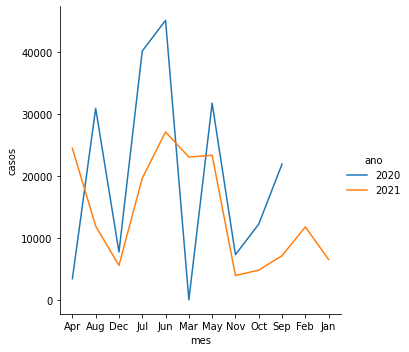

In [178]:

sns.relplot(x='mes', y='casos', data=teste.query("ano in['2020','2021']"), kind = 'line', hue='ano', row_order = meses);
plt.show()

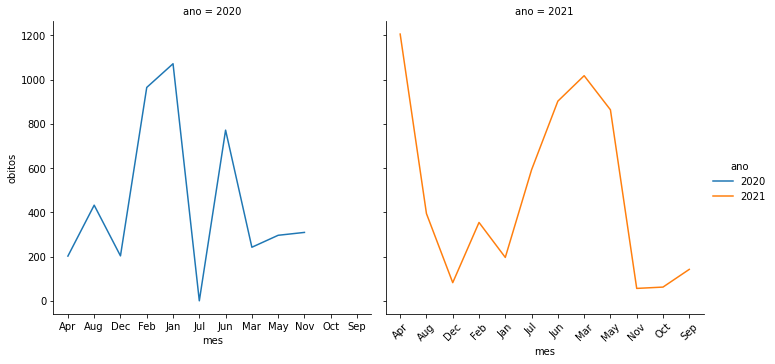

In [111]:
sns.relplot(x='mes', y='obitos', data=teste.query("ano in['2020','2021']"), kind = 'line', hue='ano', sort = False, col = 'ano');
plt.xticks(rotation=45);

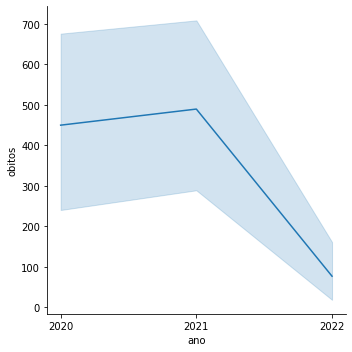

In [60]:
sns.relplot(x='ano', y='obitos', data =teste, kind = 'line');